In [1]:
import pandas as pd

In [2]:
df_listings = pd.read_csv('listings.csv')

In [3]:
#check number of columns and rows
df_listings.shape

(20420, 74)

In [4]:
#check types of columns
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
#check number of missing values in every column
df_listings.isnull().sum()
print(df_listings.isnull().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4374
Length: 74, dtype: int64


In [6]:
!pip install missingno

In [7]:
!pip install quilt

<AxesSubplot:>

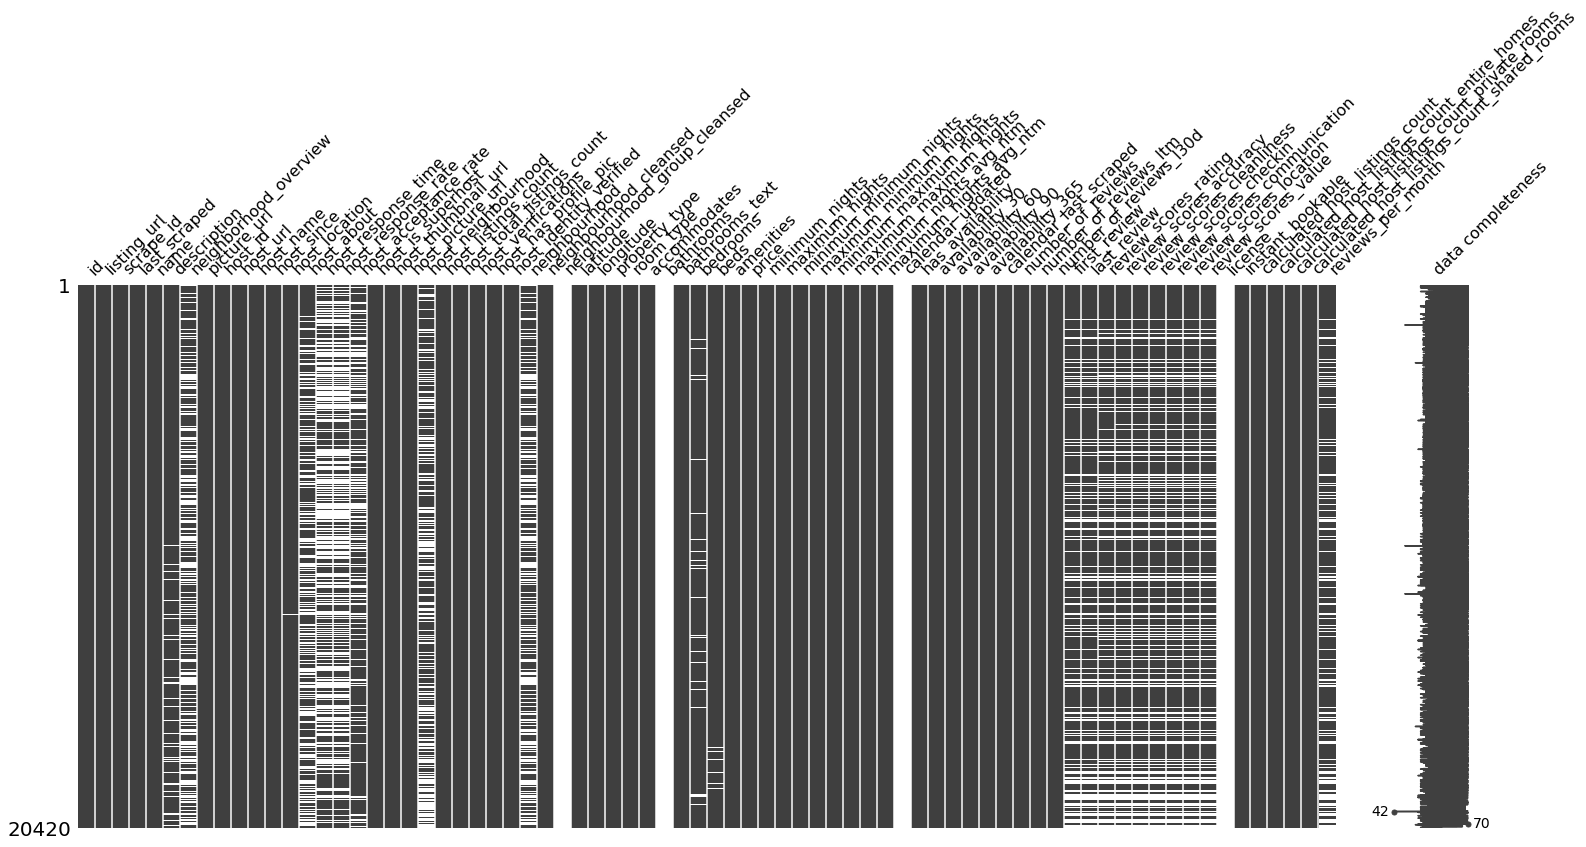

In [8]:
import missingno as msno
import numpy as np
import pandas as pd

# Missing value visualization
msno.matrix(df_listings, labels=True) 

<AxesSubplot:>

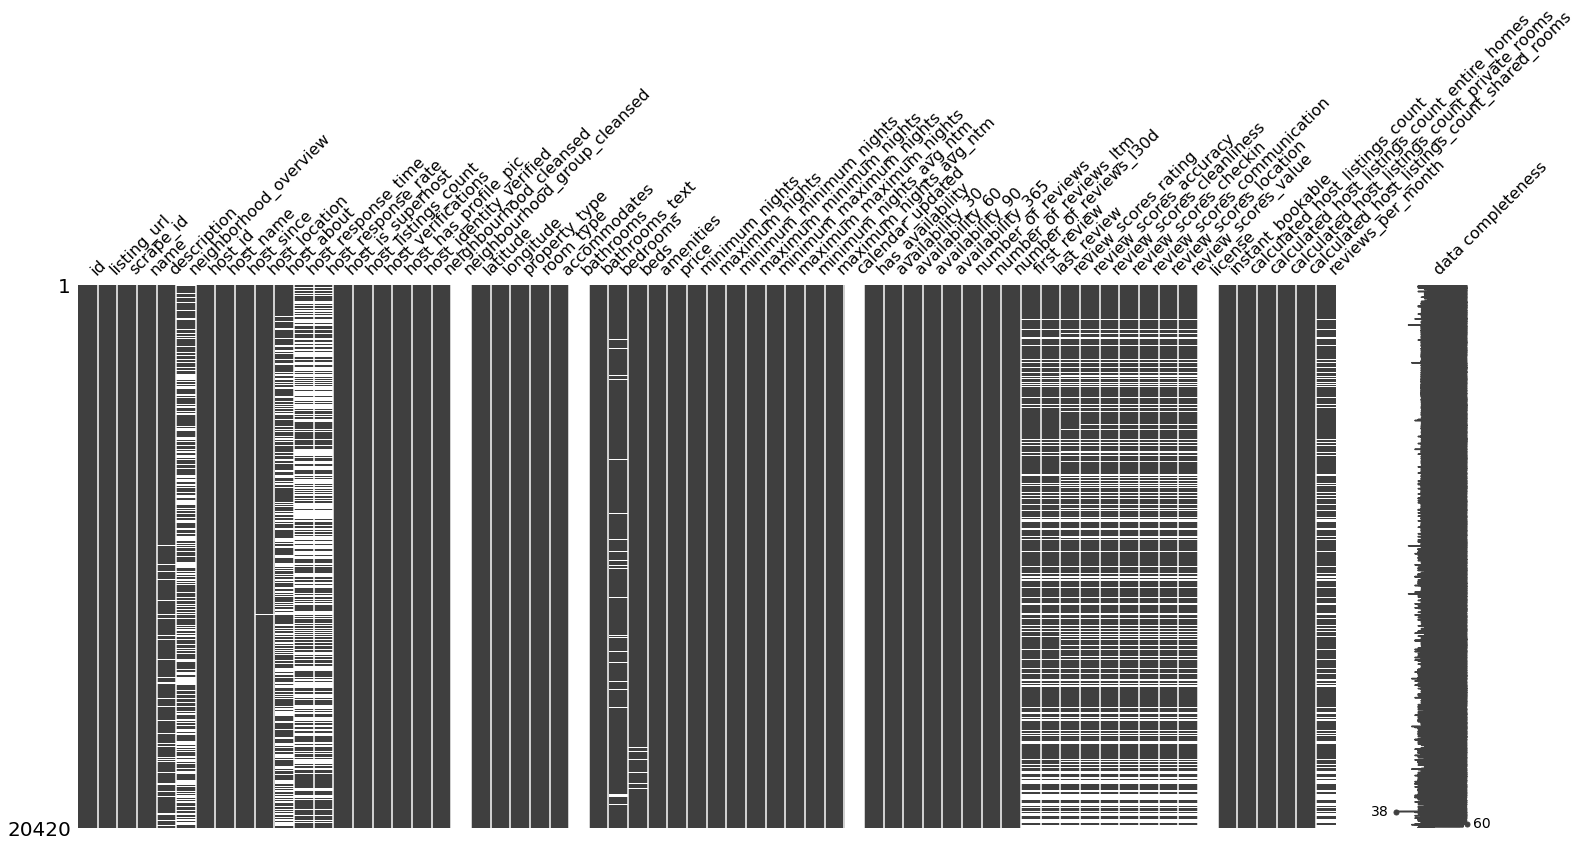

In [9]:
### according to the [1] Békés Gábor and Kézdi Gábor (2021), these columns can be useless.For me,
# delete columns contaings 'url' without missing values, I want to to some 0-1 value analysis about hosts, so these columns without missing vaules are meanlingless. 
# and some useless information, such as scrape_id, 'host_acceptance_rate'
# \because the customers cannot see the information of host_acceptance_rate\
#"host_total_listings_count",\repeat value, same as the "host_listings_count"\
# we use neighbourhood_cleansed to represent the location of home's neighbourhood,they're value after supplement \"host_neighbourhood" have too many missing values\

drops = [
    "last_scraped",
    "calendar_last_scraped", 
    "host_acceptance_rate",  
    "host_total_listings_count",
    "host_neighbourhood",
    "neighbourhood",
    "picture_url",
    "host_url",
    "host_thumbnail_url",
    "host_picture_url", 
]
df_listings_drop0=df_listings.drop(columns=drops)
msno.matrix(df_listings_drop0, labels=True) 


<AxesSubplot:>

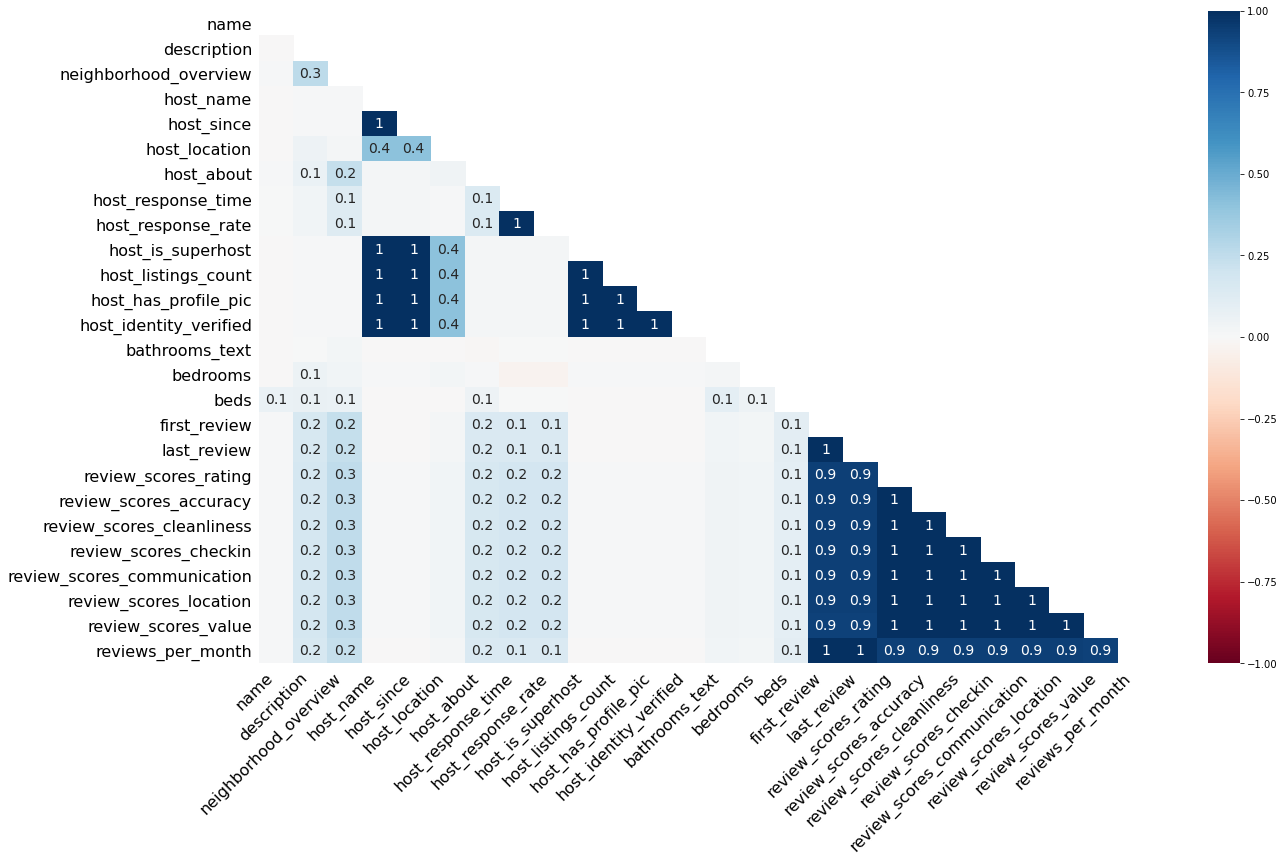

In [10]:
#热图用于确定不同列之间的零度相关性。换言之，它可以用来标识每一列之间是否存在空值关系。

#接近正1的值表示一列中存在空值与另一列中存在空值相关。接近负1的值表示一列中存在空值与另一列中存在空值是反相关的。
#换句话说，当一列中存在空值时，另一列中存在数据值，反之亦然。接近0的值表示一列中的空值与另一列中的空值之间几乎没有关系。
#有许多值显示为<-1。这表明相关性非常接近100%负。
#原文链接：https://blog.csdn.net/weixin_38037405/article/details/117856027

# Missing value heat map     
msno.heatmap(df_listings_drop0)  
#delete all rows containing missing value
#from 'first review' to 'reviews_per_month', and 'host_location', these indicators are critical for analysing the profits of different hosts
#so We cannot analyse data without these coulmns, so for these columns, we must delete all rows containing missing values
# for some indicators about hosts, it's reasonable for us to just keep these missing value, because we need to do some customers' behavior analysis,
#which will relate to whether host put their important imformation on the website.

<AxesSubplot:>

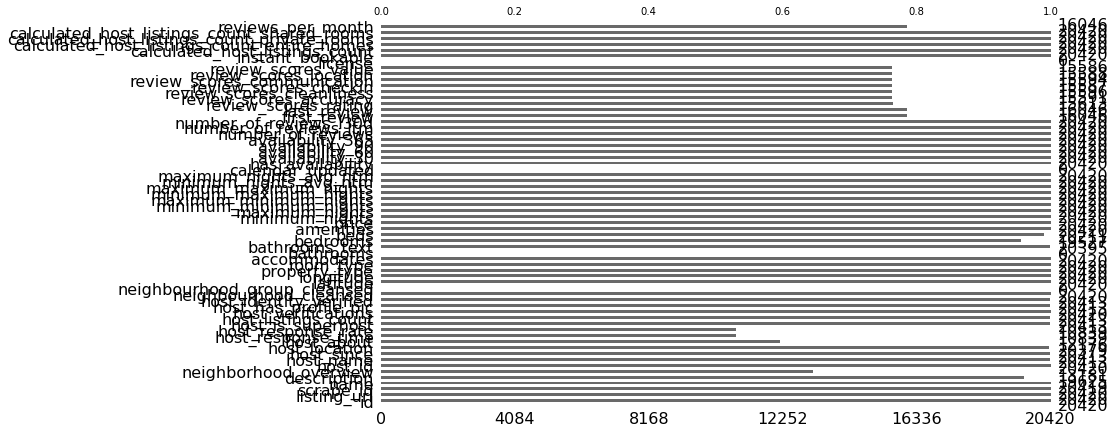

In [11]:
# bar chart
msno.bar(df_listings_drop0.sample(df_listings_drop0.shape[0]), figsize=(12, 7), )

<AxesSubplot:>

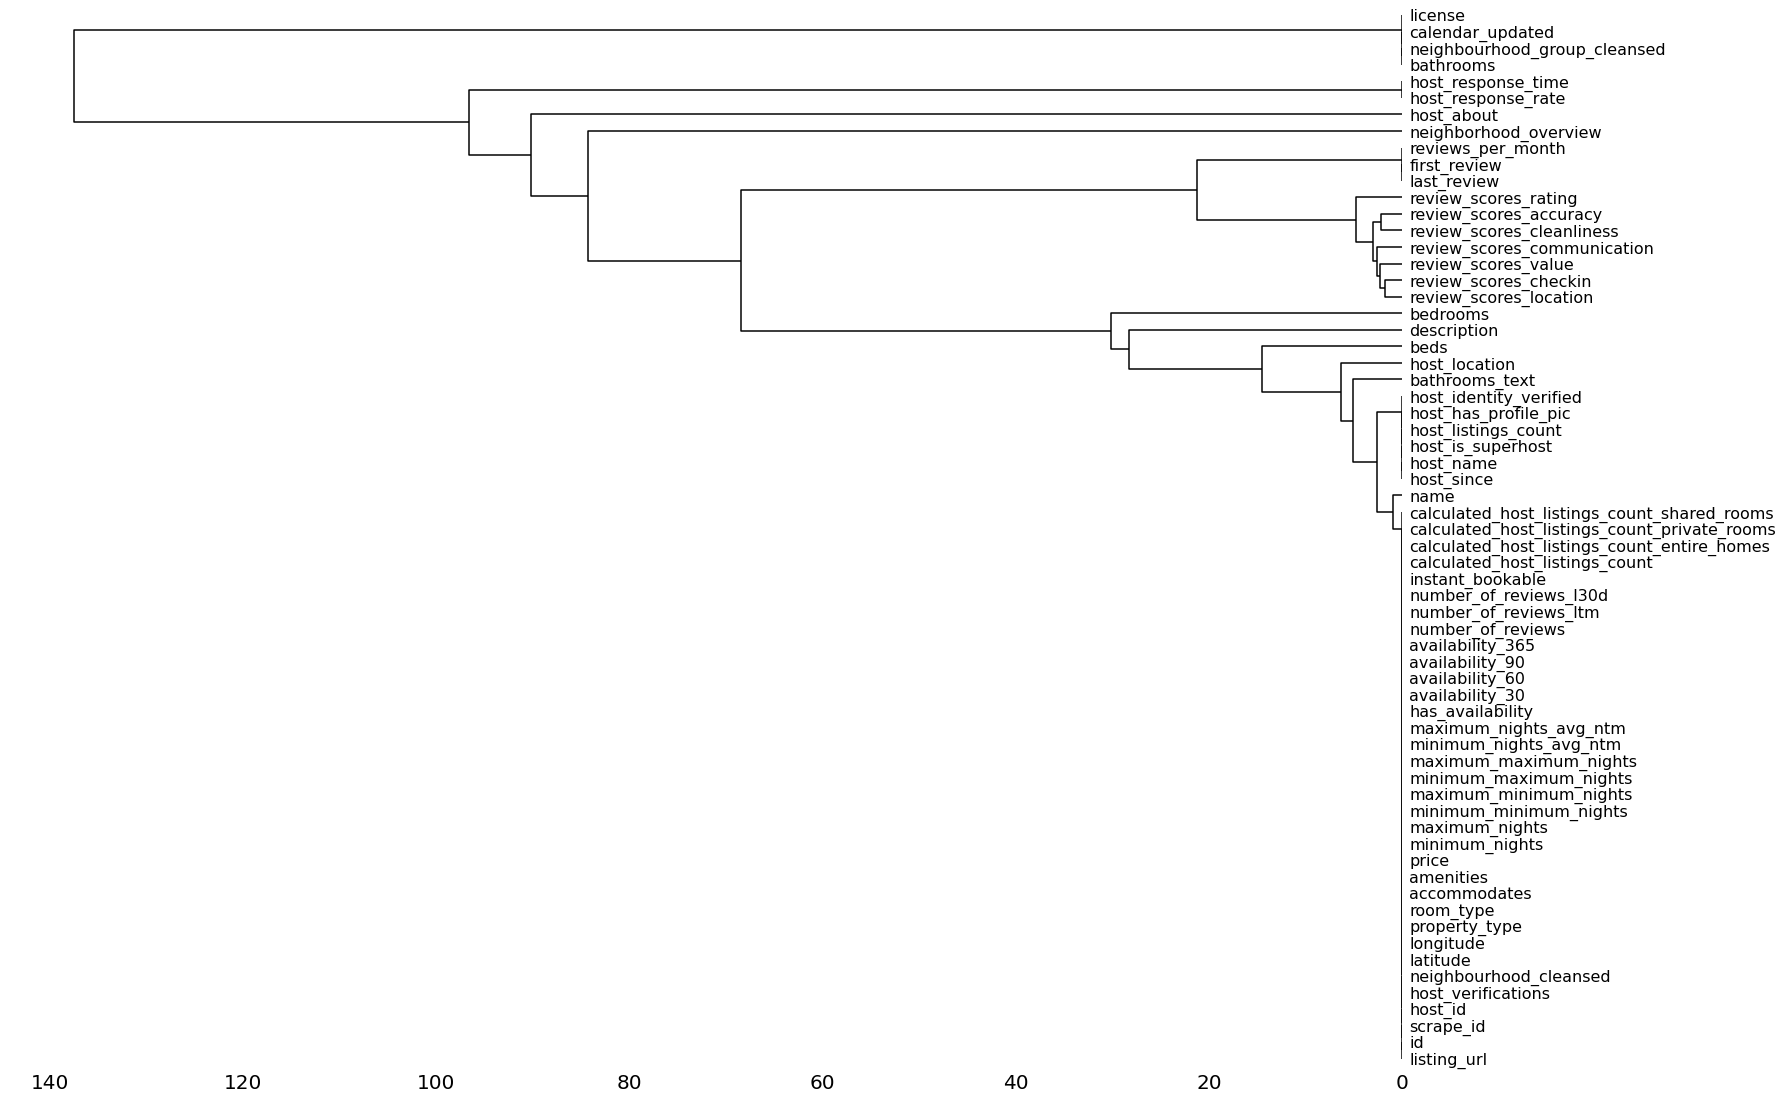

In [12]:
#missing value tree diagram
#通过树状图，可以更全面地观察缺失变量的关联性，揭示比关联热力图更深刻的相关关系：

msno.dendrogram(df_listings_drop0)

<AxesSubplot:>

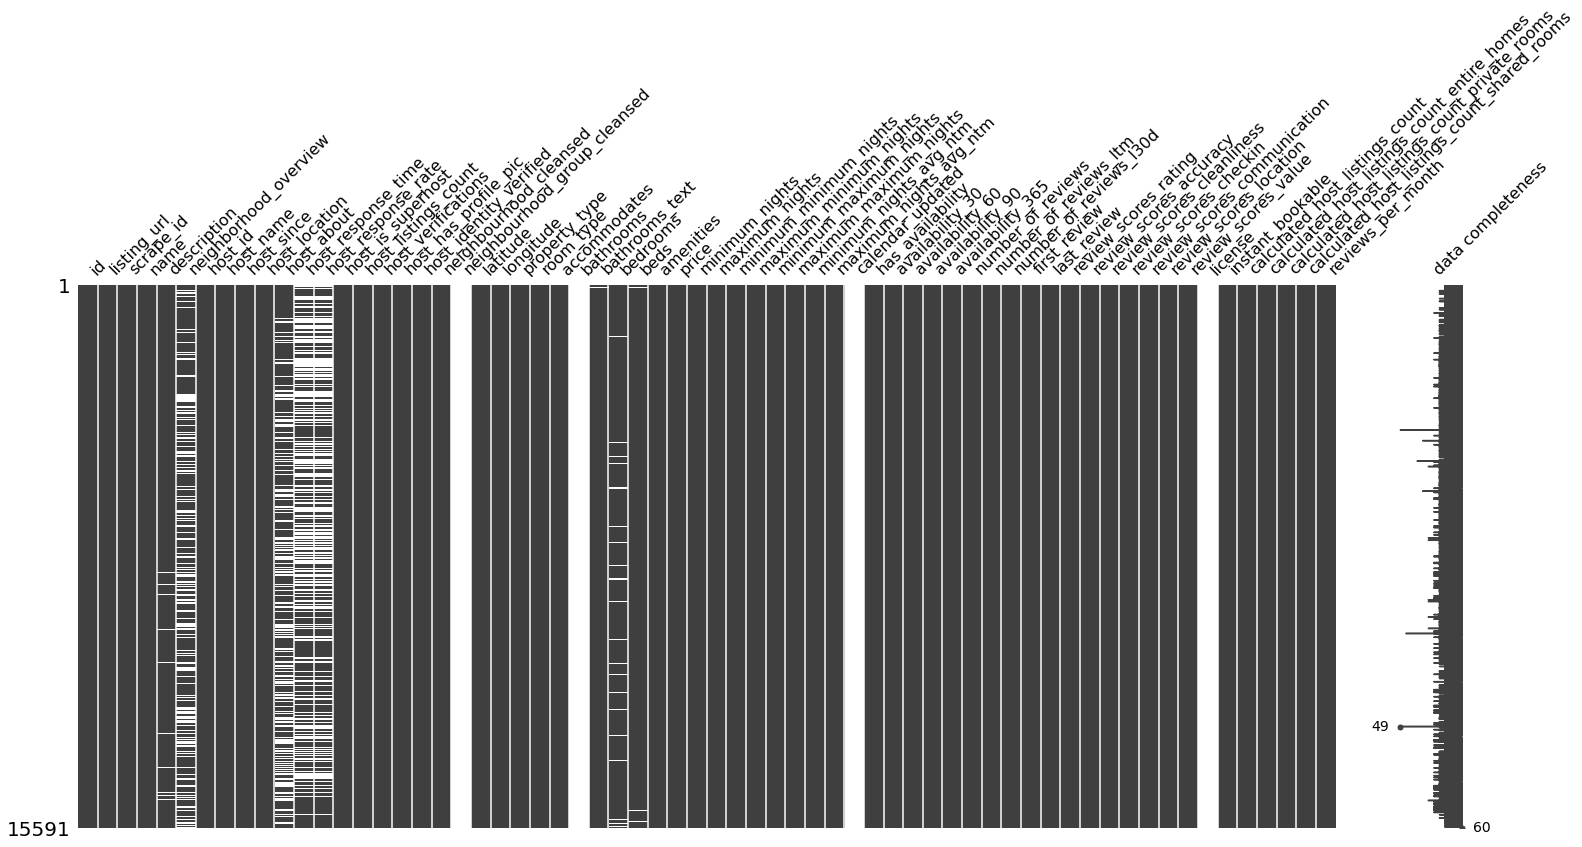

In [13]:
# the columns of 'reviews_per_month','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','host_location' is vital variables when we conduct analysis,
#so the missing value can be problem,so just delete the rows that contain missing values of these columns 
df_listings_drop1 = df_listings_drop0.dropna(subset=['reviews_per_month','review_scores_rating','review_scores_accuracy'])
msno.matrix(df_listings_drop1, labels=True) 

<AxesSubplot:>

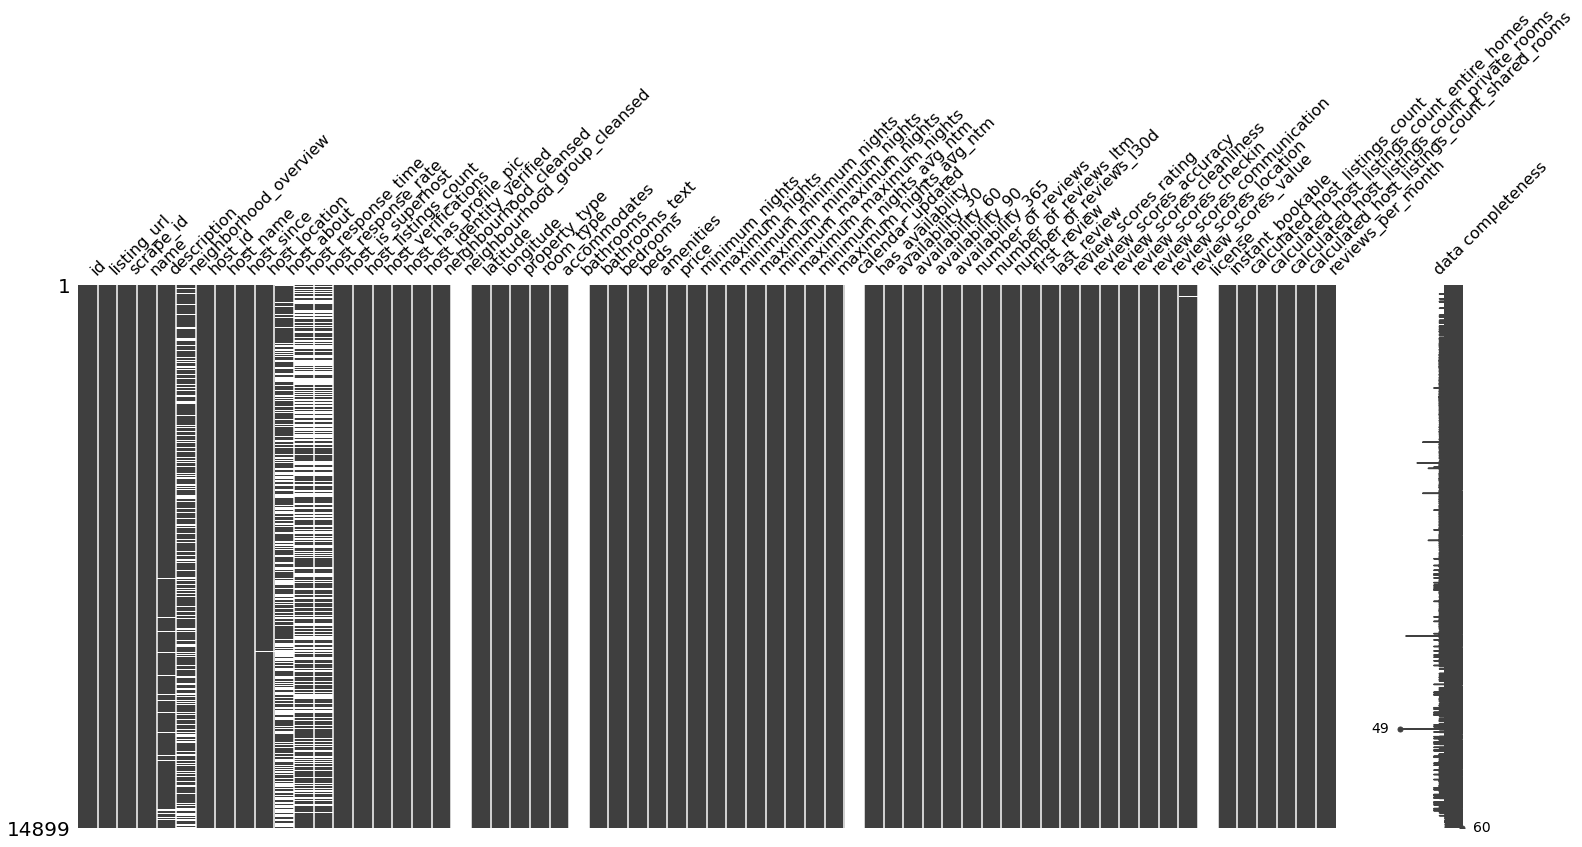

In [14]:
#delete the rows that contain missing values of amenities 
df_listings_drop2 = df_listings_drop1.dropna(subset=['bathrooms_text','bedrooms','beds'])
msno.matrix(df_listings_drop2, labels=True) 

<AxesSubplot:>

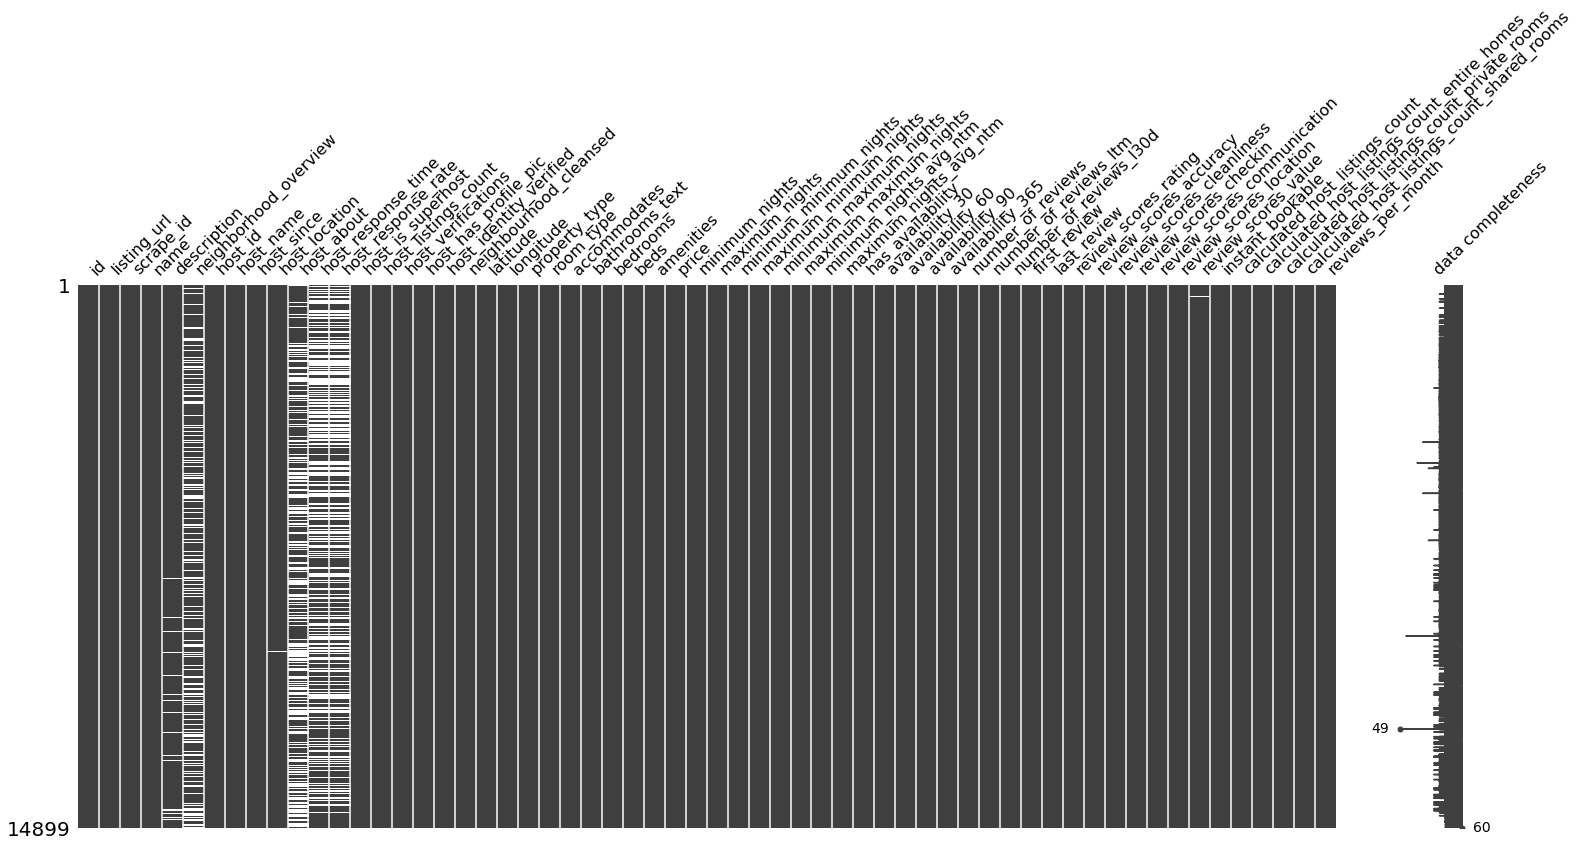

In [15]:
#delete the column containing only missing values
df_listings_drop3=df_listings_drop2.dropna(axis=1,how='all')
msno.matrix(df_listings_drop3, labels=True) 

<AxesSubplot:>

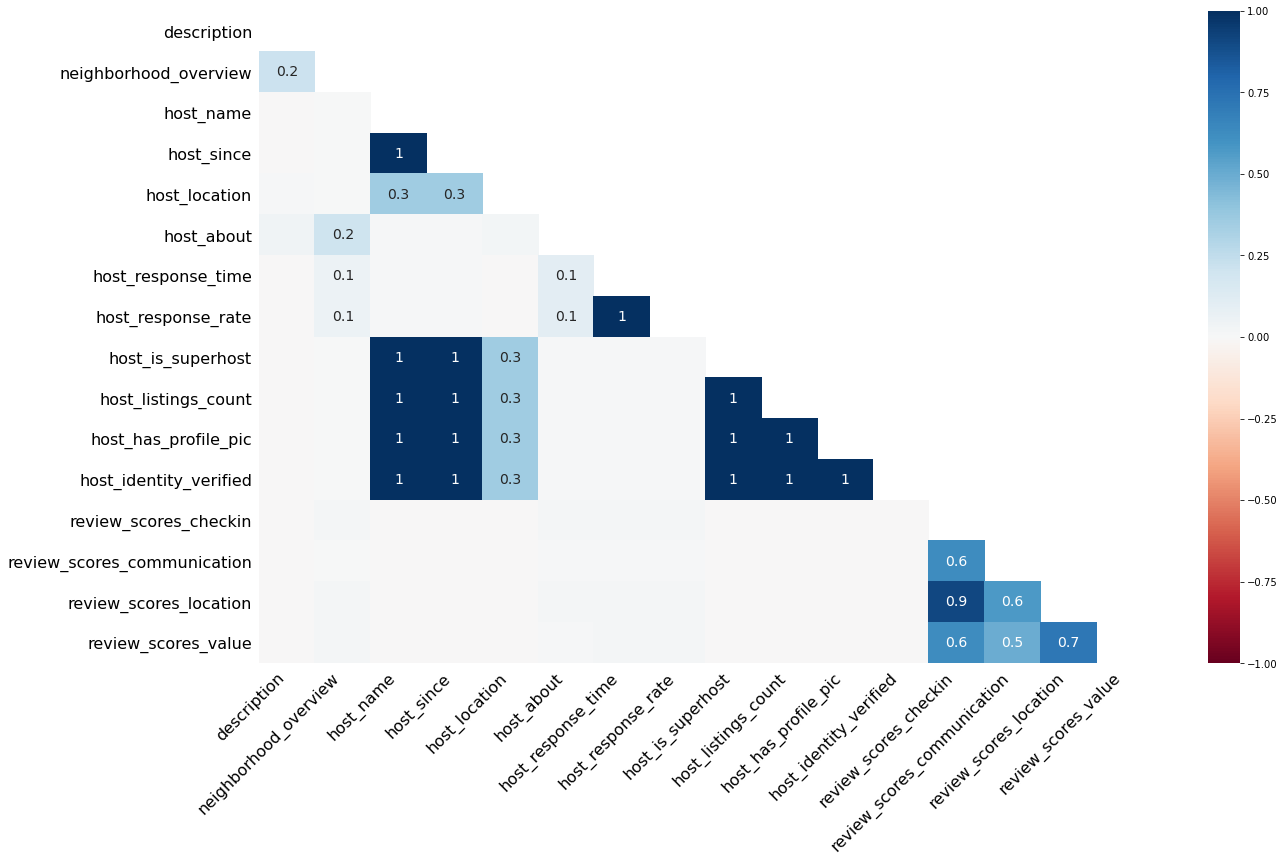

In [16]:
# hosts missing values heatmap after deleting some useless columns and rows 
msno.heatmap(df_listings_drop3) 

In [17]:
# transfer to '0-1' value : description, neighborhood_overview, host_about, host_response_time/host_response_rate【需要补齐】, 


In [18]:
#check number of missing values in every column
df_listings_drop3.isnull().sum()
print(df_listings_drop3.isnull().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
name                                               0
description                                      285
neighborhood_overview                           4216
host_id                                            0
host_name                                          2
host_since                                         2
host_location                                     16
host_about                                      5317
host_response_time                              6304
host_response_rate                              6304
host_is_superhost                                  2
host_listings_count                                2
host_verifications                                 0
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood_cleansed                        

<AxesSubplot:>

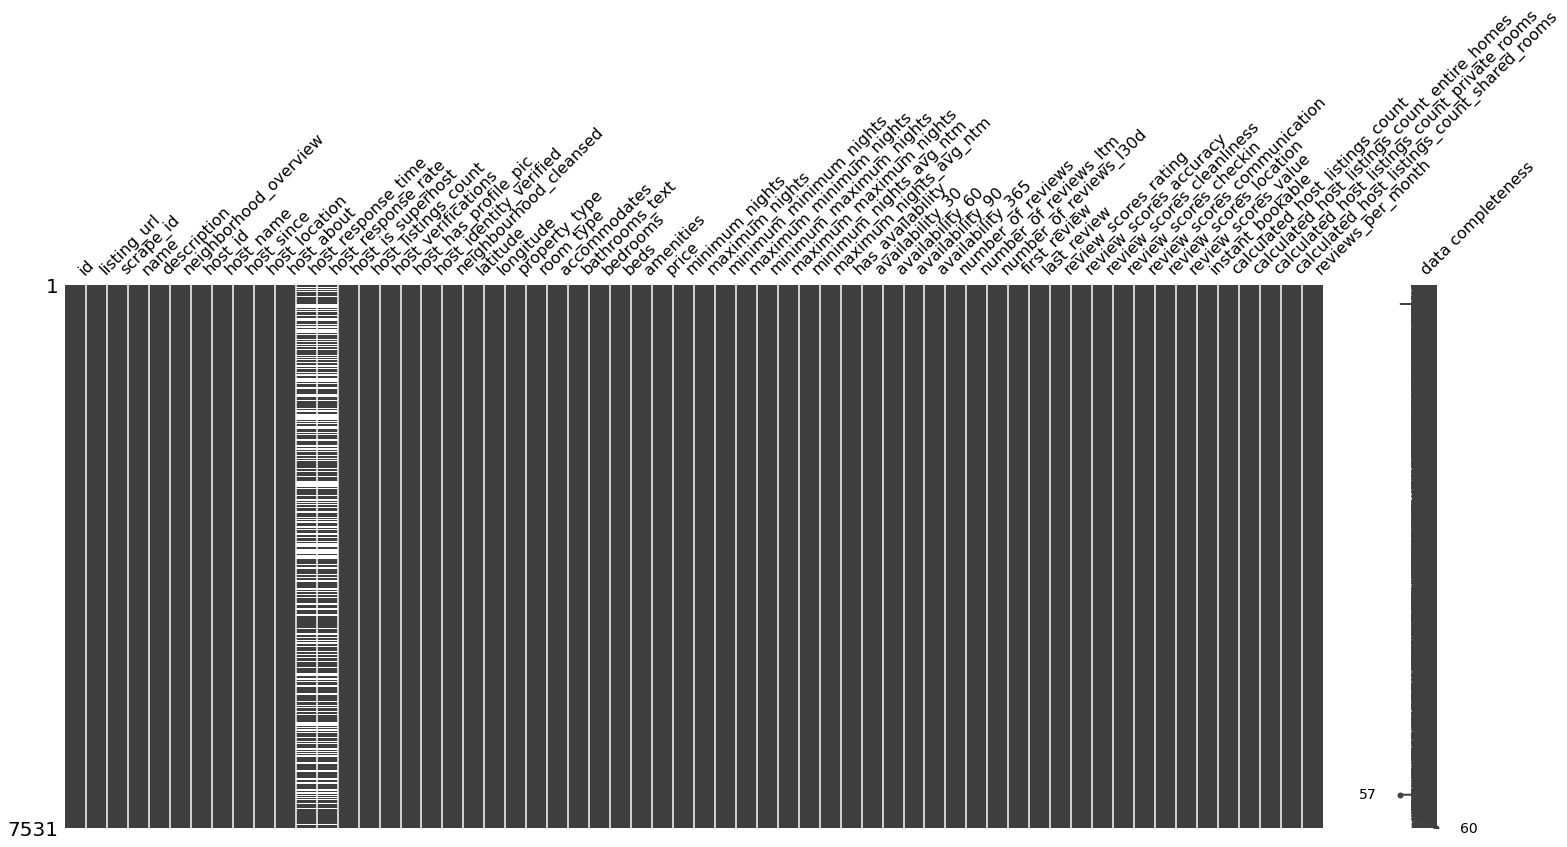

In [19]:

df_listings_drop4 = df_listings_drop3.dropna(subset=['description','neighborhood_overview','host_about'])
msno.matrix(df_listings_drop4, labels=True) 

<AxesSubplot:>

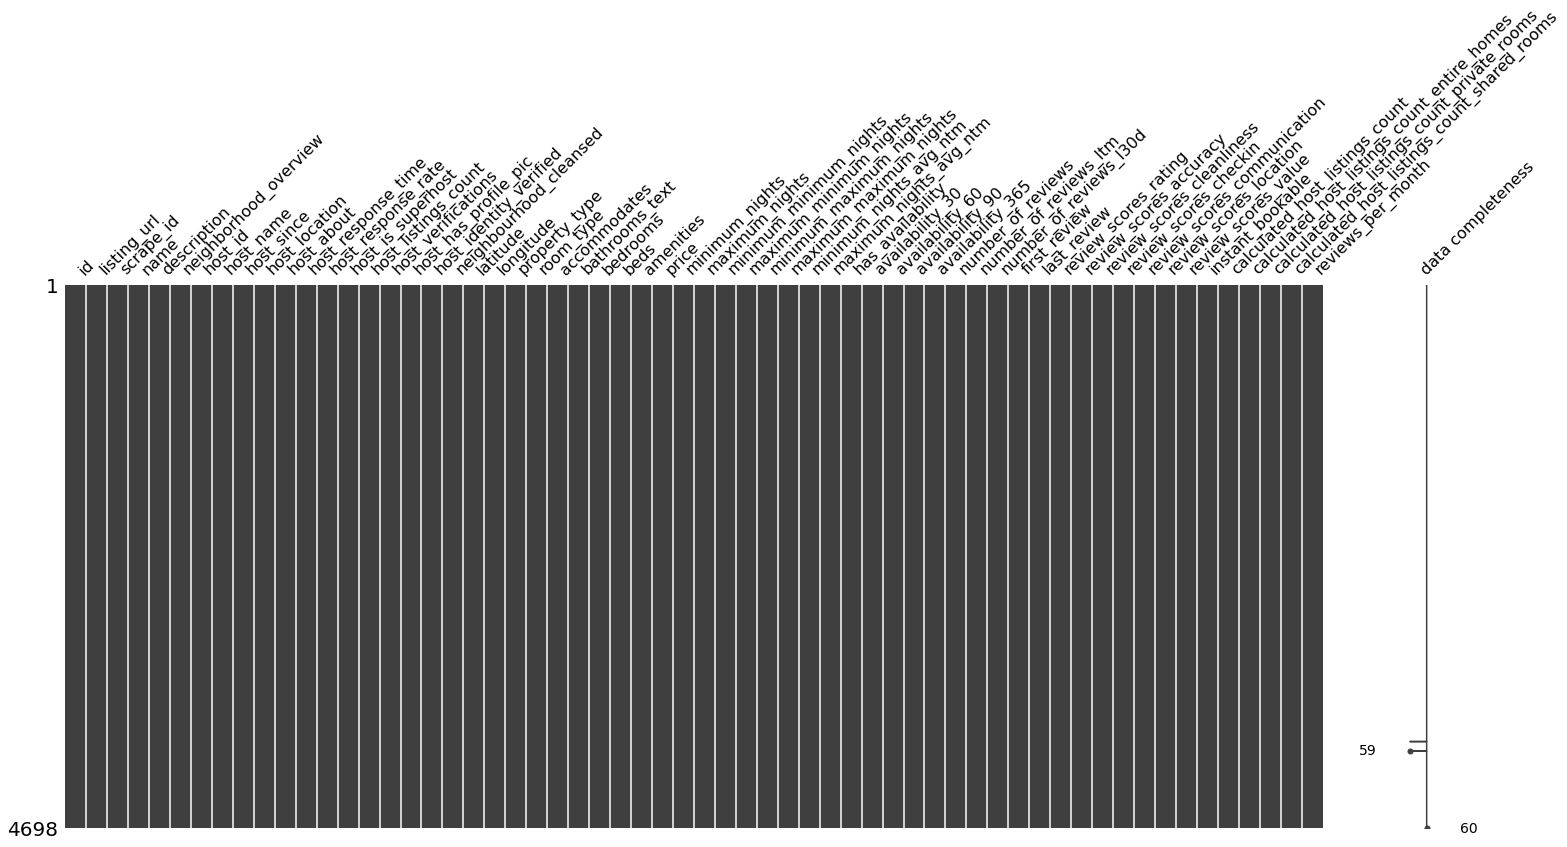

In [20]:
# Replace column missing values with 0 and others with 1
df_listings_drop5 = df_listings_drop4.dropna(subset=['host_response_time','host_response_rate'])
msno.matrix(df_listings_drop5, labels=True) 

In [21]:
df_listings_drop5['price']

1         $31.00
3         $99.00
5         $99.00
6         $79.00
8        $249.00
          ...   
20166    $105.00
20200    $170.00
20224    $111.00
20245     $95.00
20256     $20.00
Name: price, Length: 4698, dtype: object

In [23]:
# remove '$' of 'price'
def format_price(price):
    return(float(price.replace('$','').replace(',','')))

df_listings_drop5['price_$'] = df_listings_drop5['price'].apply(format_price) 
df_listings_drop5[['price','price_$']].head()

<ipython-input-23-9264ed109ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_drop5['price_$'] = df_listings_drop5['price'].apply(format_price)


,price,price_$
1,$31.00,31.0
3,$99.00,99.0
5,$99.00,99.0
6,$79.00,79.0
8,$249.00,249.0


In [24]:
# (homes' names of 100 highest profit_per_month)
df_listings_drop5['profit_per_month'] = df_listings_drop5['price_$'] * df_listings_drop5['reviews_per_month']
df_listings_drop5 = df_listings_drop5.sort_values(by=['profit_per_month'],ascending=False)
df_listings_drop5[['name','host_name','price_$','number_of_reviews','reviews_per_month','profit_per_month']].head(100)

<ipython-input-24-c1a6c568dfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_drop5['profit_per_month'] = df_listings_drop5['price_$'] * df_listings_drop5['reviews_per_month']


,name,host_name,price_$,number_of_reviews,reviews_per_month,profit_per_month
6406,Cosy Apt with luxury Tempur bed on Lygon St,Nick,7500.0,114,3.32,24900.00
11054,Be on Cloud9 - Melb Central Lux 3BR Apt,Akbar,2290.0,39,1.78,4076.20
7324,Monash University,Vickey,3228.0,32,0.94,3034.32
17491,1 Bedroom Apt - Next to The Glen Mall,Billy @ Domi Serviced Apartments,129.0,195,23.49,3030.21
17730,2 Bedroom 2 Bathroom - Next to The Glen Mall,Billy @ Domi Serviced Apartments,159.0,107,15.07,2396.13
...,...,...,...,...,...,...
13185,Studio 1158,Jim,153.0,96,6.15,940.95
5911,"Iconic ""Moonya"" - Grand Art Deco Lake Estate",Saffron,450.0,70,2.08,936.00
2288,Fantastic city location overlooking river 1,Bronnie And Neil,278.0,197,3.35,931.30
11220,"Yarra Valley - Tom's, 4 bed home. - Healesville",Andrew,436.0,43,2.13,928.68


In [26]:
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df_listings_drop5['host_location'].value_counts().head(1000)
#发现Melbourne, Victoria, Australia 的房源最多

Melbourne, Victoria, Australia                                                                                                                                      1800
Victoria, Australia                                                                                                                                                  718
AU                                                                                                                                                                   292
Australia                                                                                                                                                            112
Healesville, Victoria, Australia                                                                                                                                      46
Southbank, Victoria, Australia                                                                                                                             